Loading the dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel(r"E:\Ambikesh\AI-BharatVeda\1Chiller\CHILLER_50k.xlsx")
df.head()

,name,10,11,30001,30002,30003,30004,30005,30011,30014,...,location,name.1,refrigerantLevel,temp-1,waterInTemperature,waterInletTemperature,waterOutTemperature,waterOutetTemperature,Date,Time
0,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-07,09:40:32
1,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,Fruit_juce_1,CHILLER_3,NaN,0.1,NaN,NaN,NaN,NaN,2025-01-07,09:40:33
2,CHILLER,NaN,NaN,627.0,624.0,616.0,620.0,240.0,NaN,NaN,...,Fruit_juce_1,CHILLER_3,24.0,NaN,16.89,NaN,17.06,NaN,2025-01-07,09:40:34
3,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-07,09:41:14
4,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Fruit_juce_1,CHILLER_3,NaN,0.1,NaN,NaN,NaN,NaN,2025-01-07,09:41:15


Total columns with missing values

In [2]:
# Count missing values
missing_values = df.isnull().sum()

# Filter columns with at least one missing value
missing_columns = missing_values[missing_values > 0]

# Convert to a DataFrame to display clearly
missing_df = missing_columns.reset_index()
missing_df.columns = ['Column Name', 'Missing Values']

# Display full table with all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("🔍 Total columns with missing values:", len(missing_df))
print(missing_df)

🔍 Total columns with missing values: 85
                     Column Name  Missing Values
0                             10          352612
1                             11          352612
2                          30001          352626
3                          30002          352626
4                          30003          352626
5                          30004          352626
6                          30005          352626
7                          30011          559556
8                          30014          352624
9                          30015          352624
10                         30016          352624
11                         30019          352626
12                         30020          352626
13                         30021          352626
14                         30022          352626
15                         30023          353719
16                         30024          353719
17                         30028          352613
18                         30

Total columns with 100% missing values

In [3]:
# Find columns where all values are missing (100% NaN)
all_missing_columns = df.columns[df.isnull().all()]

# Display results
print("Total columns with 100% missing values:", len(all_missing_columns))
print("\nColumns with 100% missing values:\n")
print(all_missing_columns)

Total columns with 100% missing values: 24

Columns with 100% missing values:

Index(['30011', '40003', '40005', '40006', '40007', '40009', '40012', '40013', '40014', '40015', '40017', '40019', '40020', '40023', '40024', '40027', '40031', '40051', '40153', '40156', 'LiquidLineTempeature', 'SetPoint', 'SuctionSupeHeater', 'SunctionTemperature'], dtype='object')


In [4]:
# Find columns where all values are NaN
cols_to_drop = df.columns[df.isnull().all()]

# Drop them
df.drop(columns=cols_to_drop, inplace=True)

# Print results
print("✅ Dropped", len(cols_to_drop), "columns with 100% missing values:")
print(list(cols_to_drop))

# Show final column count
print("Remaining columns after dropping:", df.shape[1])

✅ Dropped 24 columns with 100% missing values:
['30011', '40003', '40005', '40006', '40007', '40009', '40012', '40013', '40014', '40015', '40017', '40019', '40020', '40023', '40024', '40027', '40031', '40051', '40153', '40156', 'LiquidLineTempeature', 'SetPoint', 'SuctionSupeHeater', 'SunctionTemperature']
Remaining columns after dropping: 67


In [5]:
df.head()

,name,10,11,30001,30002,30003,30004,30005,30014,30015,30016,30019,30020,30021,30022,30023,30024,30028,30029,30032,30034,30035,30209,30688,30798,CavityTemperature,ChangeinPressureinCompressor,ChillerCoolingCapacity,CoefficientOfPerformance,CompressorCycle,CompressorState,CondInTemperature,CondOutTemperature,CondenserApproach,CondenserFlowSwitch,CondenserInletTemperature,CondenserOutletTemperature,CoolerFlowSwitch,Current,DischargePressure,DischargeTemperature,ERROR,EnergyEfficiencyRatio,EvaporatorApproach,Fault,InletGuideVane,InverterTemperature,KW,Loading,Power,RunHr,SpecificPowerConsumption,SuctionPressure,SystemOFF,Voltage,deviceID,fault,location,name.1,refrigerantLevel,temp-1,waterInTemperature,waterInletTemperature,waterOutTemperature,waterOutetTemperature,Date,Time
0,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,786.0,0.0,0.0,4180.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,69.9,NaN,0.0,NaN,NaN,NaN,78.6,0.0,NaN,0.0,NaN,0.0,NaN,NaN,418.0,81cc1ee57b,NaN,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-07,09:40:32
1,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,16.0,0.0,3.0,3.0,NaN,0.0,0.0,0.0,0.3,0.0,NaN,NaN,1.6,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-0.5,NaN,NaN,NaN,NaN,0.0,0.0,0.3,0.0,NaN,0.1,NaN,81cc1ee57b,NaN,Fruit_juce_1,CHILLER_3,NaN,0.1,NaN,NaN,NaN,NaN,2025-01-07,09:40:33
2,CHILLER,NaN,NaN,627.0,624.0,616.0,620.0,240.0,NaN,NaN,NaN,0.0,620.0,625.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.6,0.0,0.0,0.0,NaN,NaN,16.44,16.67,NaN,NaN,NaN,NaN,NaN,NaN,62.5,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,62.0,NaN,NaN,81cc1ee57b,NaN,Fruit_juce_1,CHILLER_3,24.0,NaN,16.89,NaN,17.06,NaN,2025-01-07,09:40:34
3,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,784.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,78.4,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,81cc1ee57b,NaN,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-07,09:41:14
4,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4160.0,699.0,-5.0,15.0,0.0,3.0,3.0,NaN,0.0,0.0,0.0,0.3,0.0,NaN,NaN,1.5,NaN,NaN,NaN,NaN,0.0,NaN,69.9,NaN,0.0,-0.5,NaN,NaN,NaN,NaN,0.0,0.0,0.3,0.0,NaN,NaN,416.0,81cc1ee57b,NaN,Fruit_juce_1,CHILLER_3,NaN,0.1,NaN,NaN,NaN,NaN,2025-01-07,09:41:15


Mapping Chiller Register along with name

In [6]:
print("Columns before renaming:")
print(df.columns.tolist())

Columns before renaming:
['name', '10', '11', '30001', '30002', '30003', '30004', '30005', '30014', '30015', '30016', '30019', '30020', '30021', '30022', '30023', '30024', '30028', '30029', '30032', '30034', '30035', '30209', '30688', '30798', 'CavityTemperature', 'ChangeinPressureinCompressor', 'ChillerCoolingCapacity', 'CoefficientOfPerformance', 'CompressorCycle', 'CompressorState', 'CondInTemperature', 'CondOutTemperature', 'CondenserApproach', 'CondenserFlowSwitch', 'CondenserInletTemperature', 'CondenserOutletTemperature', 'CoolerFlowSwitch', 'Current', 'DischargePressure', 'DischargeTemperature', 'ERROR', 'EnergyEfficiencyRatio', 'EvaporatorApproach', 'Fault', 'InletGuideVane', 'InverterTemperature', 'KW', 'Loading', 'Power', 'RunHr', 'SpecificPowerConsumption', 'SuctionPressure', 'SystemOFF', 'Voltage', 'deviceID', 'fault', 'location', 'name.1', 'refrigerantLevel', 'temp-1', 'waterInTemperature', 'waterInletTemperature', 'waterOutTemperature', 'waterOutetTemperature', 'Date', '

In [7]:
# Define mapping: Modbus Register → Clean Sensor Names (Final)
column_mapping = {
    '30001': 'Water Outlet Temperature [30001] °F',
    '30002': 'Water Inlet Temperature [30002] °F',
    '30003': 'Condenser Inlet Temperature [30003] °F',
    '30004': 'Condenser Outlet Temperature [30004] °F',
    '30005': 'Refrigerant Level [30005] %',
    '30011': 'Compressor Cycle Count [30011]',
    '30014': 'Cooler Flow Switch [30014] ',
    '30015': 'Condenser Flow Switch [30015] ',
    '30016': 'System OFF Status [30016] (1=On, 0=Off)',
    '30019': 'Inlet Guide Vane Position [30019] %',
    '30020': 'Suction Pressure [30020] PSI',
    '30021': 'Discharge Pressure [30021] PSI',
    '30022': 'Cavity Temperature [30022] °F',
    '30023': 'Inverter Temperature [30023] °F',
    '30024': 'Power [30024] kW',
    '30028': 'Current [30028] A',
    '30029': 'Voltage [30029] V',
    '30032': 'Discharge Temperature [30032] °F',
    '30034': 'Evaporator Approach [30034] °F',
    '30035': 'Condenser Approach [30035] °F',
    '30209': 'Loading [30209] %',
    '30688': 'Run Hours [30688]',
    '00010': 'Fault Status [00010] (0=Normal, 1=Fault)',
}

# Apply renaming to the DataFrame
df.rename(columns=column_mapping, inplace=True)

# Preview renamed DataFrame
df.head()

,name,10,11,Water Outlet Temperature [30001] °F,Water Inlet Temperature [30002] °F,Condenser Inlet Temperature [30003] °F,Condenser Outlet Temperature [30004] °F,Refrigerant Level [30005] %,Cooler Flow Switch [30014],Condenser Flow Switch [30015],"System OFF Status [30016] (1=On, 0=Off)",Inlet Guide Vane Position [30019] %,Suction Pressure [30020] PSI,Discharge Pressure [30021] PSI,Cavity Temperature [30022] °F,Inverter Temperature [30023] °F,Power [30024] kW,Current [30028] A,Voltage [30029] V,Discharge Temperature [30032] °F,Evaporator Approach [30034] °F,Condenser Approach [30035] °F,Loading [30209] %,Run Hours [30688],30798,CavityTemperature,ChangeinPressureinCompressor,ChillerCoolingCapacity,CoefficientOfPerformance,CompressorCycle,CompressorState,CondInTemperature,CondOutTemperature,CondenserApproach,CondenserFlowSwitch,CondenserInletTemperature,CondenserOutletTemperature,CoolerFlowSwitch,Current,DischargePressure,DischargeTemperature,ERROR,EnergyEfficiencyRatio,EvaporatorApproach,Fault,InletGuideVane,InverterTemperature,KW,Loading,Power,RunHr,SpecificPowerConsumption,SuctionPressure,SystemOFF,Voltage,deviceID,fault,location,name.1,refrigerantLevel,temp-1,waterInTemperature,waterInletTemperature,waterOutTemperature,waterOutetTemperature,Date,Time
0,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,786.0,0.0,0.0,4180.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,69.9,NaN,0.0,NaN,NaN,NaN,78.6,0.0,NaN,0.0,NaN,0.0,NaN,NaN,418.0,81cc1ee57b,NaN,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-07,09:40:32
1,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,16.0,0.0,3.0,3.0,NaN,0.0,0.0,0.0,0.3,0.0,NaN,NaN,1.6,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-0.5,NaN,NaN,NaN,NaN,0.0,0.0,0.3,0.0,NaN,0.1,NaN,81cc1ee57b,NaN,Fruit_juce_1,CHILLER_3,NaN,0.1,NaN,NaN,NaN,NaN,2025-01-07,09:40:33
2,CHILLER,NaN,NaN,627.0,624.0,616.0,620.0,240.0,NaN,NaN,NaN,0.0,620.0,625.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.6,0.0,0.0,0.0,NaN,NaN,16.44,16.67,NaN,NaN,NaN,NaN,NaN,NaN,62.5,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,62.0,NaN,NaN,81cc1ee57b,NaN,Fruit_juce_1,CHILLER_3,24.0,NaN,16.89,NaN,17.06,NaN,2025-01-07,09:40:34
3,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,784.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,78.4,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,81cc1ee57b,NaN,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-07,09:41:14
4,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4160.0,699.0,-5.0,15.0,0.0,3.0,3.0,NaN,0.0,0.0,0.0,0.3,0.0,NaN,NaN,1.5,NaN,NaN,NaN,NaN,0.0,NaN,69.9,NaN,0.0,-0.5,NaN,NaN,NaN,NaN,0.0,0.0,0.3,0.0,NaN,NaN,416.0,81cc1ee57b,NaN,Fruit_juce_1,CHILLER_3,NaN,0.1,NaN,NaN,NaN,NaN,2025-01-07,09:41:15


In [8]:
print("Columns after renaming:")
print(df.columns.tolist())

Columns after renaming:
['name', '10', '11', 'Water Outlet Temperature [30001] °F', 'Water Inlet Temperature [30002] °F', 'Condenser Inlet Temperature [30003] °F', 'Condenser Outlet Temperature [30004] °F', 'Refrigerant Level [30005] %', 'Cooler Flow Switch [30014] ', 'Condenser Flow Switch [30015] ', 'System OFF Status [30016] (1=On, 0=Off)', 'Inlet Guide Vane Position [30019] %', 'Suction Pressure [30020] PSI', 'Discharge Pressure [30021] PSI', 'Cavity Temperature [30022] °F', 'Inverter Temperature [30023] °F', 'Power [30024] kW', 'Current [30028] A', 'Voltage [30029] V', 'Discharge Temperature [30032] °F', 'Evaporator Approach [30034] °F', 'Condenser Approach [30035] °F', 'Loading [30209] %', 'Run Hours [30688]', '30798', 'CavityTemperature', 'ChangeinPressureinCompressor', 'ChillerCoolingCapacity', 'CoefficientOfPerformance', 'CompressorCycle', 'CompressorState', 'CondInTemperature', 'CondOutTemperature', 'CondenserApproach', 'CondenserFlowSwitch', 'CondenserInletTemperature', 'Con

Percentage of missing values per column

In [9]:
# Percentage of missing values per column
missing_percent = df.isnull().mean() * 100

# Sort descending
missing_percent = missing_percent.sort_values(ascending=False)

# Display with clear formatting
print("Percentage of missing values per column:\n")
print(missing_percent)

Percentage of missing values per column:

ChangeinPressureinCompressor               99.994817
CoefficientOfPerformance                   99.994817
ChillerCoolingCapacity                     99.994817
Power                                      99.994817
SpecificPowerConsumption                   99.994817
EnergyEfficiencyRatio                      99.994817
temp-1                                     99.967832
fault                                      99.663483
CondInTemperature                          99.631672
waterInTemperature                         99.631672
waterOutTemperature                        99.631672
CondOutTemperature                         99.631672
ERROR                                      99.325001
waterOutetTemperature                      63.387221
waterInletTemperature                      63.387221
CondenserInletTemperature                  63.387221
CondenserOutletTemperature                 63.387221
Fault                                      63.385077
Cond

In [10]:
# Drop columns with more than 99% missing values
threshold = 0.99
df = df.loc[:, df.isnull().mean() <= threshold]

# Optional: Print remaining columns and their missing %
missing_summary = df.isnull().mean() * 100
print("Remaining columns with % missing values:\n")
print(missing_summary.sort_values(ascending=False))
df.head()

Remaining columns with % missing values:

CondenserInletTemperature                  63.387221
CondenserOutletTemperature                 63.387221
waterInletTemperature                      63.387221
waterOutetTemperature                      63.387221
Fault                                      63.385077
Condenser Approach [30035] °F              63.280708
CondenserApproach                          63.280708
EvaporatorApproach                         63.256046
Evaporator Approach [30034] °F             63.256046
InverterTemperature                        63.214227
Inverter Temperature [30023] °F            63.214227
Power [30024] kW                           63.214227
KW                                         63.214227
Inlet Guide Vane Position [30019] %        63.018894
Cavity Temperature [30022] °F              63.018894
Discharge Pressure [30021] PSI             63.018894
Suction Pressure [30020] PSI               63.018894
Condenser Inlet Temperature [30003] °F     63.018894
Cond

,name,10,11,Water Outlet Temperature [30001] °F,Water Inlet Temperature [30002] °F,Condenser Inlet Temperature [30003] °F,Condenser Outlet Temperature [30004] °F,Refrigerant Level [30005] %,Cooler Flow Switch [30014],Condenser Flow Switch [30015],"System OFF Status [30016] (1=On, 0=Off)",Inlet Guide Vane Position [30019] %,Suction Pressure [30020] PSI,Discharge Pressure [30021] PSI,Cavity Temperature [30022] °F,Inverter Temperature [30023] °F,Power [30024] kW,Current [30028] A,Voltage [30029] V,Discharge Temperature [30032] °F,Evaporator Approach [30034] °F,Condenser Approach [30035] °F,Loading [30209] %,Run Hours [30688],30798,CavityTemperature,CompressorCycle,CompressorState,CondenserApproach,CondenserFlowSwitch,CondenserInletTemperature,CondenserOutletTemperature,CoolerFlowSwitch,Current,DischargePressure,DischargeTemperature,EvaporatorApproach,Fault,InletGuideVane,InverterTemperature,KW,Loading,RunHr,SuctionPressure,SystemOFF,Voltage,deviceID,location,name.1,refrigerantLevel,waterInletTemperature,waterOutetTemperature,Date,Time
0,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,786.0,0.0,0.0,4180.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,69.9,NaN,NaN,NaN,78.6,0.0,NaN,NaN,NaN,NaN,418.0,81cc1ee57b,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,2025-01-07,09:40:32
1,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,16.0,0.0,3.0,3.0,NaN,0.3,0.0,1.6,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-0.5,NaN,NaN,NaN,NaN,0.0,0.3,NaN,0.1,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,2025-01-07,09:40:33
2,CHILLER,NaN,NaN,627.0,624.0,616.0,620.0,240.0,NaN,NaN,NaN,0.0,620.0,625.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,62.0,NaN,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,24.0,NaN,NaN,2025-01-07,09:40:34
3,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,784.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.4,0.0,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,2025-01-07,09:41:14
4,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4160.0,699.0,-5.0,15.0,0.0,3.0,3.0,NaN,0.3,0.0,1.5,NaN,NaN,NaN,NaN,0.0,NaN,69.9,-0.5,NaN,NaN,NaN,NaN,0.0,0.3,NaN,NaN,416.0,81cc1ee57b,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,2025-01-07,09:41:15


Off On Correlation

In [11]:
# Ensure both columns are numeric
df['SystemOFF'] = pd.to_numeric(df['SystemOFF'], errors='coerce')
df['System OFF Status [30016] (1=On, 0=Off)'] = pd.to_numeric(df['System OFF Status [30016] (1=On, 0=Off)'], errors='coerce')

# Compute correlation between the two
correlation = df['SystemOFF'].corr(df['System OFF Status [30016] (1=On, 0=Off)'])
print("Correlation between SystemOFF and System OFF Status [30016]:", correlation)

Correlation between SystemOFF and System OFF Status [30016]: 0.9816921919861145


In [12]:
# Ensure both are numeric
df['SystemOFF'] = pd.to_numeric(df['SystemOFF'], errors='coerce')
df['System OFF Status [30016] (1=On, 0=Off)'] = pd.to_numeric(df['System OFF Status [30016] (1=On, 0=Off)'], errors='coerce')

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Correlation with both system status columns
corr_with_systemoff = numeric_df.corr()[['SystemOFF', 'System OFF Status [30016] (1=On, 0=Off)']]

# Sort by SystemOFF correlation
corr_with_systemoff_sorted = corr_with_systemoff.sort_values(by='SystemOFF', ascending=False)

print("Correlation with SystemOFF and System OFF Status:\n")
print(corr_with_systemoff_sorted)


Correlation with SystemOFF and System OFF Status:

                                         SystemOFF  System OFF Status [30016] (1=On, 0=Off)
SystemOFF                                 1.000000                                 0.981692
System OFF Status [30016] (1=On, 0=Off)   0.981692                                 1.000000
SuctionPressure                           0.720995                                 0.755460
DischargePressure                         0.661553                                 0.695506
InverterTemperature                       0.250872                                 0.250872
Water Outlet Temperature [30001] °F       0.195731                                 0.201388
Suction Pressure [30020] PSI              0.177858                                 0.182345
Water Inlet Temperature [30002] °F        0.150495                                 0.155773
waterOutetTemperature                     0.129045                                 0.129045
waterInletTemperature        

In [13]:
# Ensure both are numeric
df['SystemOFF'] = pd.to_numeric(df['SystemOFF'], errors='coerce')
df['System OFF Status [30016] (1=On, 0=Off)'] = pd.to_numeric(df['System OFF Status [30016] (1=On, 0=Off)'], errors='coerce')

# Compute correlation between the two columns
correlation = df['SystemOFF'].corr(df['System OFF Status [30016] (1=On, 0=Off)'])
print("Correlation between SystemOFF and System OFF Status [30016]:", correlation)

# Drop the redundant 'SystemOFF' column
df.drop(columns='SystemOFF', inplace=True)

# Select numeric columns and compute correlation with 'System OFF Status [30016]'
numeric_df = df.select_dtypes(include='number')
corr_with_status = numeric_df.corr()[['System OFF Status [30016] (1=On, 0=Off)']]

# Sort and display correlation
print("\nCorrelation with System OFF Status [30016]:\n")
print(corr_with_status.sort_values(by='System OFF Status [30016] (1=On, 0=Off)', ascending=False))

Correlation between SystemOFF and System OFF Status [30016]: 0.9816921919861145

Correlation with System OFF Status [30016]:

                                         System OFF Status [30016] (1=On, 0=Off)
System OFF Status [30016] (1=On, 0=Off)                                 1.000000
SuctionPressure                                                         0.755460
DischargePressure                                                       0.695506
InverterTemperature                                                     0.250872
Water Outlet Temperature [30001] °F                                     0.201388
Suction Pressure [30020] PSI                                            0.182345
Water Inlet Temperature [30002] °F                                      0.155773
waterOutetTemperature                                                   0.129045
CavityTemperature                                                       0.092993
waterInletTemperature                                           

In [14]:
df.head()

,name,10,11,Water Outlet Temperature [30001] °F,Water Inlet Temperature [30002] °F,Condenser Inlet Temperature [30003] °F,Condenser Outlet Temperature [30004] °F,Refrigerant Level [30005] %,Cooler Flow Switch [30014],Condenser Flow Switch [30015],"System OFF Status [30016] (1=On, 0=Off)",Inlet Guide Vane Position [30019] %,Suction Pressure [30020] PSI,Discharge Pressure [30021] PSI,Cavity Temperature [30022] °F,Inverter Temperature [30023] °F,Power [30024] kW,Current [30028] A,Voltage [30029] V,Discharge Temperature [30032] °F,Evaporator Approach [30034] °F,Condenser Approach [30035] °F,Loading [30209] %,Run Hours [30688],30798,CavityTemperature,CompressorCycle,CompressorState,CondenserApproach,CondenserFlowSwitch,CondenserInletTemperature,CondenserOutletTemperature,CoolerFlowSwitch,Current,DischargePressure,DischargeTemperature,EvaporatorApproach,Fault,InletGuideVane,InverterTemperature,KW,Loading,RunHr,SuctionPressure,Voltage,deviceID,location,name.1,refrigerantLevel,waterInletTemperature,waterOutetTemperature,Date,Time
0,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,786.0,0.0,0.0,4180.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,69.9,NaN,NaN,NaN,78.6,0.0,NaN,NaN,NaN,418.0,81cc1ee57b,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,2025-01-07,09:40:32
1,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,16.0,0.0,3.0,3.0,NaN,0.3,0.0,1.6,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-0.5,NaN,NaN,NaN,NaN,0.0,0.3,NaN,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,2025-01-07,09:40:33
2,CHILLER,NaN,NaN,627.0,624.0,616.0,620.0,240.0,NaN,NaN,NaN,0.0,620.0,625.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,62.0,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,24.0,NaN,NaN,2025-01-07,09:40:34
3,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,784.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.4,0.0,NaN,NaN,NaN,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,2025-01-07,09:41:14
4,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4160.0,699.0,-5.0,15.0,0.0,3.0,3.0,NaN,0.3,0.0,1.5,NaN,NaN,NaN,NaN,0.0,NaN,69.9,-0.5,NaN,NaN,NaN,NaN,0.0,0.3,NaN,416.0,81cc1ee57b,Fruit_juce_1,CHILLER_3,NaN,NaN,NaN,2025-01-07,09:41:15


Correlation b/w all duplictes columns

In [15]:
import pandas as pd

# List of suspected duplicate column pairs
potential_duplicates = [
    ("Current", "Current [30028] A"),
    ("Voltage", "Voltage [30029] V"),
    ("KW", "Power [30024] kW"),
    ("Loading", "Loading [30209] %"),
    ("RunHr", "Run Hours [30688]"),
    ("EvaporatorApproach", "Evaporator Approach [30034] °F"),
    ("CondenserApproach", "Condenser Approach [30035] °F"),
    ("DischargeTemperature", "Discharge Temperature [30032] °F"),
    ("InverterTemperature", "Inverter Temperature [30023] °F"),
    ("InletGuideVane", "Inlet Guide Vane Position [30019] %"),
    ("CavityTemperature", "Cavity Temperature [30022] °F"),
    ("SuctionPressure", "Suction Pressure [30020] PSI"),
    ("DischargePressure", "Discharge Pressure [30021] PSI"),
    ("CoolerFlowSwitch", "Cooler Flow Switch [30014]"),
    ("CondenserFlowSwitch", "Condenser Flow Switch [30015]"),
    ("CondenserInletTemperature", "Condenser Inlet Temperature [30003] °F"),
    ("CondenserOutletTemperature", "Condenser Outlet Temperature [30004] °F"),
    ("refrigerantLevel", "Refrigerant Level [30005] %"),
    ("waterInletTemperature", "Water Inlet Temperature [30002] °F"),
    ("waterOutetTemperature", "Water Outlet Temperature [30001] °F"),
    ("CompressorCycle", "CompressorState"),
]

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Collect correlation results
results = []
for col1, col2 in potential_duplicates:
    if col1 in df.columns and col2 in df.columns:
        df[col1] = pd.to_numeric(df[col1], errors='coerce')
        df[col2] = pd.to_numeric(df[col2], errors='coerce')
        corr = df[[col1, col2]].corr().iloc[0, 1]
        results.append((col1, col2, round(corr, 4)))
    else:
        results.append((col1, col2, "MISSING"))

# Sort by correlation value (skip 'MISSING' entries for sorting)
sorted_results = sorted(results, key=lambda x: abs(x[2]) if isinstance(x[2], float) else -1, reverse=True)

# Print table header
print("Column A".ljust(30) + "Column B".ljust(45) + "Correlation")
print("-" * 90)

# Print sorted results
for col1, col2, corr in sorted_results:
    print(str(col1).ljust(30) + str(col2).ljust(45) + str(corr))

Column A                      Column B                                     Correlation
------------------------------------------------------------------------------------------
Current                       Current [30028] A                            1.0
Voltage                       Voltage [30029] V                            1.0
Loading                       Loading [30209] %                            1.0
RunHr                         Run Hours [30688]                            1.0
InletGuideVane                Inlet Guide Vane Position [30019] %          1.0
CoolerFlowSwitch              Cooler Flow Switch [30014]                   1.0
CondenserFlowSwitch           Condenser Flow Switch [30015]                1.0
CondenserInletTemperature     Condenser Inlet Temperature [30003] °F       1.0
CondenserOutletTemperature    Condenser Outlet Temperature [30004] °F      1.0
refrigerantLevel              Refrigerant Level [30005] %                  1.0
waterInletTemperature         Wa

droping columns which has correlation 1

In [16]:
# Drop non-register (simple) duplicate columns that are perfectly correlated
df.drop(columns=[
    "Current",
    "Voltage",
    "Loading",
    "RunHr",
    "InletGuideVane",
    "CoolerFlowSwitch",
    "CondenserFlowSwitch",
    "CondenserInletTemperature",
    "CondenserOutletTemperature",
    "refrigerantLevel",
    "waterInletTemperature",
    "waterOutetTemperature"
], inplace=True)
df.drop(columns=["EvaporatorApproach"], inplace=True)

In [17]:
print(df.columns.tolist())

['name', '10', '11', 'Water Outlet Temperature [30001] °F', 'Water Inlet Temperature [30002] °F', 'Condenser Inlet Temperature [30003] °F', 'Condenser Outlet Temperature [30004] °F', 'Refrigerant Level [30005] %', 'Cooler Flow Switch [30014]', 'Condenser Flow Switch [30015]', 'System OFF Status [30016] (1=On, 0=Off)', 'Inlet Guide Vane Position [30019] %', 'Suction Pressure [30020] PSI', 'Discharge Pressure [30021] PSI', 'Cavity Temperature [30022] °F', 'Inverter Temperature [30023] °F', 'Power [30024] kW', 'Current [30028] A', 'Voltage [30029] V', 'Discharge Temperature [30032] °F', 'Evaporator Approach [30034] °F', 'Condenser Approach [30035] °F', 'Loading [30209] %', 'Run Hours [30688]', '30798', 'CavityTemperature', 'CompressorCycle', 'CompressorState', 'CondenserApproach', 'DischargePressure', 'DischargeTemperature', 'Fault', 'InverterTemperature', 'KW', 'SuctionPressure', 'deviceID', 'location', 'name.1', 'Date', 'Time']


Creating timestamps

In [18]:
# Ensure both are strings, then combine
df['Timestamp'] = pd.to_datetime(
    df['Date'].astype(str) + ' ' + df['Time'].astype(str),
    errors='coerce'
)

# Drop invalid
df.dropna(subset=['Timestamp'], inplace=True)

# Sort
df.sort_values(by='Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,name,10,11,Water Outlet Temperature [30001] °F,Water Inlet Temperature [30002] °F,Condenser Inlet Temperature [30003] °F,Condenser Outlet Temperature [30004] °F,Refrigerant Level [30005] %,Cooler Flow Switch [30014],Condenser Flow Switch [30015],"System OFF Status [30016] (1=On, 0=Off)",Inlet Guide Vane Position [30019] %,Suction Pressure [30020] PSI,Discharge Pressure [30021] PSI,Cavity Temperature [30022] °F,Inverter Temperature [30023] °F,Power [30024] kW,Current [30028] A,Voltage [30029] V,Discharge Temperature [30032] °F,Evaporator Approach [30034] °F,Condenser Approach [30035] °F,Loading [30209] %,Run Hours [30688],30798,CavityTemperature,CompressorCycle,CompressorState,CondenserApproach,DischargePressure,DischargeTemperature,Fault,InverterTemperature,KW,SuctionPressure,deviceID,location,name.1,Date,Time,Timestamp
0,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,786.0,0.0,0.0,4180.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.9,NaN,78.6,0.0,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,2025-01-07,09:40:32,2025-01-07 09:40:32
1,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,16.0,0.0,3.0,3.0,NaN,0.3,0.0,1.6,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,2025-01-07,09:40:33,2025-01-07 09:40:33
2,CHILLER,NaN,NaN,627.0,624.0,616.0,620.0,240.0,NaN,NaN,NaN,0.0,620.0,625.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.6,NaN,NaN,NaN,62.5,NaN,NaN,NaN,NaN,62.0,81cc1ee57b,Fruit_juce_1,CHILLER_3,2025-01-07,09:40:34,2025-01-07 09:40:34
3,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,784.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.4,0.0,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,2025-01-07,09:41:14,2025-01-07 09:41:14
4,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4160.0,699.0,-5.0,15.0,0.0,3.0,3.0,NaN,0.3,0.0,1.5,NaN,69.9,NaN,NaN,NaN,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,2025-01-07,09:41:15,2025-01-07 09:41:15


In [19]:
df.rename(columns={'System OFF Status [30016] (1=On, 0=Off)': 'System OFF Status [30016] (1=Off, 0=On)'}, inplace=True)
df.head()

,name,10,11,Water Outlet Temperature [30001] °F,Water Inlet Temperature [30002] °F,Condenser Inlet Temperature [30003] °F,Condenser Outlet Temperature [30004] °F,Refrigerant Level [30005] %,Cooler Flow Switch [30014],Condenser Flow Switch [30015],"System OFF Status [30016] (1=Off, 0=On)",Inlet Guide Vane Position [30019] %,Suction Pressure [30020] PSI,Discharge Pressure [30021] PSI,Cavity Temperature [30022] °F,Inverter Temperature [30023] °F,Power [30024] kW,Current [30028] A,Voltage [30029] V,Discharge Temperature [30032] °F,Evaporator Approach [30034] °F,Condenser Approach [30035] °F,Loading [30209] %,Run Hours [30688],30798,CavityTemperature,CompressorCycle,CompressorState,CondenserApproach,DischargePressure,DischargeTemperature,Fault,InverterTemperature,KW,SuctionPressure,deviceID,location,name.1,Date,Time,Timestamp
0,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,786.0,0.0,0.0,4180.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.9,NaN,78.6,0.0,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,2025-01-07,09:40:32,2025-01-07 09:40:32
1,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,16.0,0.0,3.0,3.0,NaN,0.3,0.0,1.6,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,2025-01-07,09:40:33,2025-01-07 09:40:33
2,CHILLER,NaN,NaN,627.0,624.0,616.0,620.0,240.0,NaN,NaN,NaN,0.0,620.0,625.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.6,NaN,NaN,NaN,62.5,NaN,NaN,NaN,NaN,62.0,81cc1ee57b,Fruit_juce_1,CHILLER_3,2025-01-07,09:40:34,2025-01-07 09:40:34
3,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,784.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.4,0.0,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,2025-01-07,09:41:14,2025-01-07 09:41:14
4,CHILLER,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4160.0,699.0,-5.0,15.0,0.0,3.0,3.0,NaN,0.3,0.0,1.5,NaN,69.9,NaN,NaN,NaN,NaN,81cc1ee57b,Fruit_juce_1,CHILLER_3,2025-01-07,09:41:15,2025-01-07 09:41:15


In [20]:
df.shape

(559556, 41)

In [21]:
df['Power [30024] kW'].describe()
#since we use power [30024] KW

count    205837.000000
mean        245.963316
std         177.843999
min        -999.000000
25%         174.000000
50%         250.000000
75%         326.000000
max         878.000000
Name: Power [30024] kW, dtype: float64

Monthly power consumption

In [22]:
# Ensure timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


# Extract Month-Year for grouping
df['MonthYear'] = df['Timestamp'].dt.to_period('M')


# Group by MonthYear and calculate averages
monthly_power_kw_avg = df.groupby('MonthYear')[['Power [30024] kW', 'KW']].mean().reset_index()

# Optional: round for neat output
monthly_power_kw_avg = monthly_power_kw_avg.round(2)

# Display the result
print(monthly_power_kw_avg)
# since we use Power [30024] kW 

  MonthYear  Power [30024] kW     KW
0   2025-01             87.87  37.41
1   2025-02            228.36  22.84
2   2025-03            189.59  18.96
3   2025-04            251.25  25.12
4   2025-05            313.63  31.36
5   2025-06            261.31  26.13
6   2025-07            472.45  47.24


In [23]:
df['System OFF Status [30016] (1=Off, 0=On)'].value_counts(dropna=False)

System OFF Status [30016] (1=Off, 0=On)
NaN    352624
0.0    202837
1.0      4095
Name: count, dtype: int64

In [24]:
df['Cooler Flow Switch [30014]'].value_counts(dropna=False)



Cooler Flow Switch [30014]
NaN    352624
1.0    191112
0.0     15820
Name: count, dtype: int64

In [25]:
df['Condenser Flow Switch [30015]'].value_counts(dropna=False)


Condenser Flow Switch [30015]
NaN    352624
1.0    190223
0.0     16709
Name: count, dtype: int64

In [26]:
# Ensure the column names are clean if needed
df.columns = df.columns.str.strip()

# Filter valid operating rows
df_operating = df[
    (df['System OFF Status [30016] (1=Off, 0=On)'] == 0) &
    (df['Cooler Flow Switch [30014]'] == 1) &
    (df['Condenser Flow Switch [30015]'] == 1)
]

# Optional: reset index for easier handling
df_operating = df_operating.reset_index(drop=True)

# Show filtered data
print("Filtered operating rows:", len(df_operating))
df_operating.head()

Filtered operating rows: 189430


,name,10,11,Water Outlet Temperature [30001] °F,Water Inlet Temperature [30002] °F,Condenser Inlet Temperature [30003] °F,Condenser Outlet Temperature [30004] °F,Refrigerant Level [30005] %,Cooler Flow Switch [30014],Condenser Flow Switch [30015],"System OFF Status [30016] (1=Off, 0=On)",Inlet Guide Vane Position [30019] %,Suction Pressure [30020] PSI,Discharge Pressure [30021] PSI,Cavity Temperature [30022] °F,Inverter Temperature [30023] °F,Power [30024] kW,Current [30028] A,Voltage [30029] V,Discharge Temperature [30032] °F,Evaporator Approach [30034] °F,Condenser Approach [30035] °F,Loading [30209] %,Run Hours [30688],30798,CavityTemperature,CompressorCycle,CompressorState,CondenserApproach,DischargePressure,DischargeTemperature,Fault,InverterTemperature,KW,SuctionPressure,deviceID,location,name.1,Date,Time,Timestamp,MonthYear
0,CHILLER,NaN,NaN,625.0,627.0,618.0,624.0,239.0,1.0,1.0,0.0,0.0,611.0,610.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,4.21,NaN,NaN,NaN,NaN,4.21,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:06:59,2025-01-09 15:06:59,2025-01
1,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:07:41,2025-01-09 15:07:41,2025-01
2,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,25.0,636.0,3.0,4.0,NaN,4.0,NaN,1.39,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:08:23,2025-01-09 15:08:23,2025-01
3,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,130.0,636.0,3.0,4.0,NaN,4.0,NaN,7.22,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:09:05,2025-01-09 15:09:05,2025-01
4,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,80.0,636.0,3.0,4.0,NaN,4.0,NaN,4.44,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:09:47,2025-01-09 15:09:47,2025-01


In [27]:
print(df_operating['Power [30024] kW'].describe())


count    149.000000
mean     282.832215
std      160.165092
min        0.000000
25%      212.000000
50%      274.000000
75%      338.000000
max      773.000000
Name: Power [30024] kW, dtype: float64


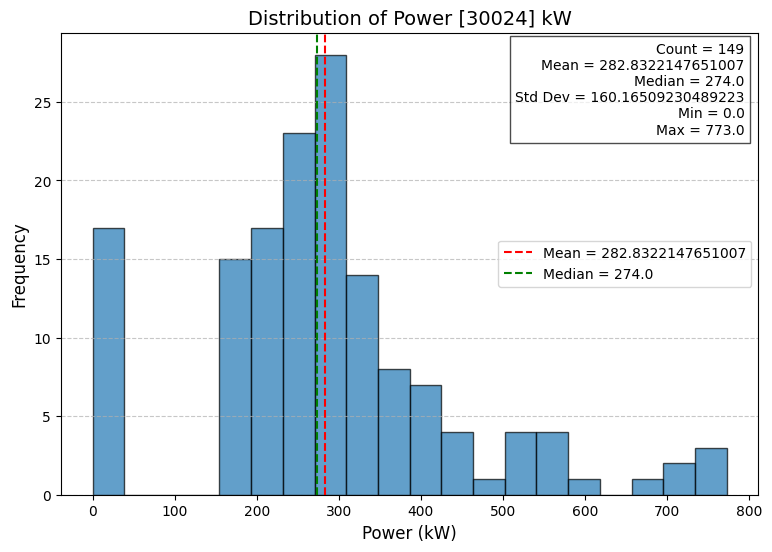

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Get statistics
mean_val = df_operating['Power [30024] kW'].mean()
median_val = df_operating['Power [30024] kW'].median()
std_val = df_operating['Power [30024] kW'].std()
min_val = df_operating['Power [30024] kW'].min()
max_val = df_operating['Power [30024] kW'].max()

# Plot histogram
plt.figure(figsize=(9, 6))
plt.hist(df_operating['Power [30024] kW'], bins=20, edgecolor='black', alpha=0.7)
plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean = {mean_val}")
plt.axvline(median_val, color='green', linestyle='--', label=f"Median = {median_val}")

# Text box with stats (no formatting)
stats_text = (
    f"Count = {df_operating['Power [30024] kW'].count()}\n"
    f"Mean = {mean_val}\n"
    f"Median = {median_val}\n"
    f"Std Dev = {std_val}\n"
    f"Min = {min_val}\n"
    f"Max = {max_val}"
)
plt.text(0.98, 0.98, stats_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.7))

# Labels and title
plt.title('Distribution of Power [30024] kW', fontsize=14)
plt.xlabel('Power (kW)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [29]:
df_operating.columns.tolist()

['name',
 '10',
 '11',
 'Water Outlet Temperature [30001] °F',
 'Water Inlet Temperature [30002] °F',
 'Condenser Inlet Temperature [30003] °F',
 'Condenser Outlet Temperature [30004] °F',
 'Refrigerant Level [30005] %',
 'Cooler Flow Switch [30014]',
 'Condenser Flow Switch [30015]',
 'System OFF Status [30016] (1=Off, 0=On)',
 'Inlet Guide Vane Position [30019] %',
 'Suction Pressure [30020] PSI',
 'Discharge Pressure [30021] PSI',
 'Cavity Temperature [30022] °F',
 'Inverter Temperature [30023] °F',
 'Power [30024] kW',
 'Current [30028] A',
 'Voltage [30029] V',
 'Discharge Temperature [30032] °F',
 'Evaporator Approach [30034] °F',
 'Condenser Approach [30035] °F',
 'Loading [30209] %',
 'Run Hours [30688]',
 '30798',
 'CavityTemperature',
 'CompressorCycle',
 'CompressorState',
 'CondenserApproach',
 'DischargePressure',
 'DischargeTemperature',
 'Fault',
 'InverterTemperature',
 'KW',
 'SuctionPressure',
 'deviceID',
 'location',
 'name.1',
 'Date',
 'Time',
 'Timestamp',
 'Mont

In [30]:
df_operating.head()

,name,10,11,Water Outlet Temperature [30001] °F,Water Inlet Temperature [30002] °F,Condenser Inlet Temperature [30003] °F,Condenser Outlet Temperature [30004] °F,Refrigerant Level [30005] %,Cooler Flow Switch [30014],Condenser Flow Switch [30015],"System OFF Status [30016] (1=Off, 0=On)",Inlet Guide Vane Position [30019] %,Suction Pressure [30020] PSI,Discharge Pressure [30021] PSI,Cavity Temperature [30022] °F,Inverter Temperature [30023] °F,Power [30024] kW,Current [30028] A,Voltage [30029] V,Discharge Temperature [30032] °F,Evaporator Approach [30034] °F,Condenser Approach [30035] °F,Loading [30209] %,Run Hours [30688],30798,CavityTemperature,CompressorCycle,CompressorState,CondenserApproach,DischargePressure,DischargeTemperature,Fault,InverterTemperature,KW,SuctionPressure,deviceID,location,name.1,Date,Time,Timestamp,MonthYear
0,CHILLER,NaN,NaN,625.0,627.0,618.0,624.0,239.0,1.0,1.0,0.0,0.0,611.0,610.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,4.21,NaN,NaN,NaN,NaN,4.21,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:06:59,2025-01-09 15:06:59,2025-01
1,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:07:41,2025-01-09 15:07:41,2025-01
2,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,25.0,636.0,3.0,4.0,NaN,4.0,NaN,1.39,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:08:23,2025-01-09 15:08:23,2025-01
3,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,130.0,636.0,3.0,4.0,NaN,4.0,NaN,7.22,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:09:05,2025-01-09 15:09:05,2025-01
4,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,80.0,636.0,3.0,4.0,NaN,4.0,NaN,4.44,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:09:47,2025-01-09 15:09:47,2025-01


In [31]:
# Step 1: Columns to check
cols_to_check = [
    "Loading [30209] %",
    "Water Inlet Temperature [30002] °F",
    "Water Outlet Temperature [30001] °F",
    "Condenser Inlet Temperature [30003] °F",
    "Condenser Outlet Temperature [30004] °F",
    "Suction Pressure [30020] PSI",
    "Discharge Pressure [30021] PSI",
    "Inlet Guide Vane Position [30019] %",
    "Evaporator Approach [30034] °F",
    "Condenser Approach [30035] °F",
    "Current [30028] A",
    "Voltage [30029] V",
    "Discharge Temperature [30032] °F",
    "Inverter Temperature [30023] °F"
]

# Step 2: Keep only available columns
available_cols = [col for col in cols_to_check if col in df_operating.columns]

# Step 3: Compute correlation table
correlation_table = df_operating[available_cols + ["Power [30024] kW"]].corr()

# Step 4: Print raw correlation with Power
print("\nRaw correlation with Power [30024] kW:\n")
print(correlation_table["Power [30024] kW"])

# Step 5: Interpret direction of impact
print("\nImpact direction:")
for col in available_cols:
    corr = correlation_table.loc[col, "Power [30024] kW"]
    if corr > 0:
        print(f"{col} ↑ → Power ↑ (positive correlation)")
    elif corr < 0:
        print(f"{col} ↑ → Power ↓ (negative correlation)")
    else:
        print(f"{col} shows no correlation with Power")



Raw correlation with Power [30024] kW:

Loading [30209] %                          0.873110
Water Inlet Temperature [30002] °F         0.551917
Water Outlet Temperature [30001] °F       -0.158184
Condenser Inlet Temperature [30003] °F     0.597363
Condenser Outlet Temperature [30004] °F    0.775167
Suction Pressure [30020] PSI              -0.672289
Discharge Pressure [30021] PSI             0.925623
Inlet Guide Vane Position [30019] %        0.793020
Evaporator Approach [30034] °F             0.827423
Condenser Approach [30035] °F              0.704029
Current [30028] A                          0.999151
Voltage [30029] V                         -0.531866
Discharge Temperature [30032] °F           0.807902
Inverter Temperature [30023] °F            0.613524
Power [30024] kW                           1.000000
Name: Power [30024] kW, dtype: float64

Impact direction:
Loading [30209] % ↑ → Power ↑ (positive correlation)
Water Inlet Temperature [30002] °F ↑ → Power ↑ (positive correlation

In [32]:
missing_counts = df_operating.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print(missing_counts)

Power [30024] kW                           189281
Inverter Temperature [30023] °F            189281
InverterTemperature                        189281
KW                                         189281
Discharge Temperature [30032] °F           158843
Current [30028] A                          158843
Voltage [30029] V                          158843
DischargeTemperature                       158843
10                                         121772
Fault                                      121772
CompressorState                            121772
11                                         121772
Condenser Outlet Temperature [30004] °F     98358
Refrigerant Level [30005] %                 98358
Water Outlet Temperature [30001] °F         98358
Inlet Guide Vane Position [30019] %         98358
Suction Pressure [30020] PSI                98358
Discharge Pressure [30021] PSI              98358
Cavity Temperature [30022] °F               98358
Water Inlet Temperature [30002] °F          98358


Power column (make invalids → NaN)

In [33]:
# 1. Convert to numeric (invalid parsing → NaN)
df_operating['Power [30024] kW'] = pd.to_numeric(df_operating['Power [30024] kW'], errors='coerce')

# 2. Replace placeholder invalid values with NaN
invalid_values = [-999, -99, 9999]
df_operating['Power [30024] kW'] = df_operating['Power [30024] kW'].replace(invalid_values, np.nan)
# 3. Mask negative power values as NaN
df_operating['Power [30024] kW'] = df_operating['Power [30024] kW'].mask(df_operating['Power [30024] kW'] < 0)
df_operating['Power [30024] kW'].describe()

count    149.000000
mean     282.832215
std      160.165092
min        0.000000
25%      212.000000
50%      274.000000
75%      338.000000
max      773.000000
Name: Power [30024] kW, dtype: float64

In [34]:
cols_of_interest = [
    'Loading [30209] %',
    'Current [30028] A',
    'Water Inlet Temperature [30002] °F',
    'Condenser Inlet Temperature [30003] °F',
    'Discharge Temperature [30032] °F',
    'Water Outlet Temperature [30001] °F',
    'Voltage [30029] V',
    'Discharge Pressure [30021] PSI',
    'Evaporator Approach [30034] °F',
    'Condenser Approach [30035] °F'
]

# Calculate counts and missing values
missing_summary = pd.DataFrame({
    'Non-Null Count': df_operating[cols_of_interest].count(),
    'Missing Count': df_operating[cols_of_interest].isna().sum(),
    'Missing %': df_operating[cols_of_interest].isna().mean() * 100
})

print(missing_summary)

                                        Non-Null Count  Missing Count  Missing %
Loading [30209] %                               140302          49128  25.934646
Current [30028] A                                30587         158843  83.853138
Water Inlet Temperature [30002] °F               91072          98358  51.923138
Condenser Inlet Temperature [30003] °F           91072          98358  51.923138
Discharge Temperature [30032] °F                 30587         158843  83.853138
Water Outlet Temperature [30001] °F              91072          98358  51.923138
Voltage [30029] V                                30587         158843  83.853138
Discharge Pressure [30021] PSI                   91072          98358  51.923138
Evaporator Approach [30034] °F                  100982          88448  46.691654
Condenser Approach [30035] °F                   100982          88448  46.691654


In [35]:

df_operating.head()


,name,10,11,Water Outlet Temperature [30001] °F,Water Inlet Temperature [30002] °F,Condenser Inlet Temperature [30003] °F,Condenser Outlet Temperature [30004] °F,Refrigerant Level [30005] %,Cooler Flow Switch [30014],Condenser Flow Switch [30015],"System OFF Status [30016] (1=Off, 0=On)",Inlet Guide Vane Position [30019] %,Suction Pressure [30020] PSI,Discharge Pressure [30021] PSI,Cavity Temperature [30022] °F,Inverter Temperature [30023] °F,Power [30024] kW,Current [30028] A,Voltage [30029] V,Discharge Temperature [30032] °F,Evaporator Approach [30034] °F,Condenser Approach [30035] °F,Loading [30209] %,Run Hours [30688],30798,CavityTemperature,CompressorCycle,CompressorState,CondenserApproach,DischargePressure,DischargeTemperature,Fault,InverterTemperature,KW,SuctionPressure,deviceID,location,name.1,Date,Time,Timestamp,MonthYear
0,CHILLER,NaN,NaN,625.0,627.0,618.0,624.0,239.0,1.0,1.0,0.0,0.0,611.0,610.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,4.21,NaN,NaN,NaN,NaN,4.21,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:06:59,2025-01-09 15:06:59,2025-01
1,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:07:41,2025-01-09 15:07:41,2025-01
2,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,25.0,636.0,3.0,4.0,NaN,4.0,NaN,1.39,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:08:23,2025-01-09 15:08:23,2025-01
3,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,130.0,636.0,3.0,4.0,NaN,4.0,NaN,7.22,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:09:05,2025-01-09 15:09:05,2025-01
4,CHILLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,80.0,636.0,3.0,4.0,NaN,4.0,NaN,4.44,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:09:47,2025-01-09 15:09:47,2025-01


In [36]:
# Calculate time differences
df_operating['time_diff'] = df_operating['Timestamp'].diff()

# Check first few differences
print(df_operating['time_diff'].head(50))


0                NaT
1    0 days 00:00:42
2    0 days 00:00:42
3    0 days 00:00:42
4    0 days 00:00:42
5    0 days 00:00:42
6    0 days 00:00:42
7    0 days 00:00:42
8    0 days 00:00:42
9    0 days 00:00:42
10   0 days 00:00:42
11   0 days 00:00:42
12   0 days 00:00:42
13   0 days 00:00:42
14   0 days 00:00:42
15   0 days 00:00:42
16   0 days 00:00:42
17   0 days 00:00:44
18   0 days 00:00:40
19   0 days 00:00:42
20   0 days 00:00:42
21   0 days 00:00:42
22   0 days 00:00:42
23   0 days 00:00:42
24   0 days 00:00:42
25   0 days 00:00:42
26   0 days 00:00:42
27   0 days 00:00:42
28   0 days 00:00:42
29   0 days 00:00:42
30   0 days 00:00:42
31   0 days 00:00:42
32   0 days 00:00:42
33   0 days 00:00:42
34   0 days 00:00:42
35   0 days 00:00:42
36   0 days 00:00:42
37   0 days 00:00:42
38   0 days 00:00:42
39   0 days 00:00:42
40   0 days 00:00:42
41   0 days 00:00:42
42   0 days 00:00:42
43   0 days 00:00:42
44   0 days 00:00:42
45   0 days 00:00:42
46   0 days 00:00:42
47   0 days 0

In [37]:
df_operating[[
    'Loading [30209] %',
    'Current [30028] A',
    'Water Inlet Temperature [30002] °F',
    'Condenser Inlet Temperature [30003] °F',
    'Discharge Temperature [30032] °F',
    'Water Outlet Temperature [30001] °F',
    'Voltage [30029] V',
    'Discharge Pressure [30021] PSI',
    'Evaporator Approach [30034] °F',
    'Condenser Approach [30035] °F'
]].describe()

,Loading [30209] %,Current [30028] A,Water Inlet Temperature [30002] °F,Condenser Inlet Temperature [30003] °F,Discharge Temperature [30032] °F,Water Outlet Temperature [30001] °F,Voltage [30029] V,Discharge Pressure [30021] PSI,Evaporator Approach [30034] °F,Condenser Approach [30035] °F
count,140302.000000,30587.000000,91072.000000,91072.000000,30587.000000,91072.000000,30587.000000,91072.000000,100982.000000,100982.000000
mean,489.774401,498.745219,492.795140,760.238954,998.383137,455.578696,3971.175336,928.288332,42.142402,30.221941
std,253.049630,254.525626,28.735502,53.558137,209.805505,29.047123,170.769531,219.582815,63.694990,126.388493
min,0.000000,-9990.000000,423.000000,581.000000,-5596.000000,410.000000,-9990.000000,-147.000000,-95.000000,-2216.000000
25%,462.000000,360.000000,474.000000,720.000000,948.000000,441.000000,3930.000000,870.000000,30.000000,44.000000
50%,462.000000,450.000000,488.000000,758.000000,998.000000,448.000000,3970.000000,954.000000,42.000000,58.000000
75%,636.000000,590.000000,504.000000,804.000000,1059.000000,455.000000,4020.000000,1062.000000,55.000000,77.000000
max,1000.000000,1400.000000,897.000000,972.000000,1389.000000,897.000000,4380.000000,1568.000000,1904.000000,325.000000


In [38]:
features = [
    'Loading [30209] %',
    'Current [30028] A',
    'Water Inlet Temperature [30002] °F',
    'Condenser Inlet Temperature [30003] °F',
    'Discharge Temperature [30032] °F',
    'Water Outlet Temperature [30001] °F',
    'Voltage [30029] V',
    'Discharge Pressure [30021] PSI',
    'Evaporator Approach [30034] °F',
    'Condenser Approach [30035] °F'
]

# Count negative values in each column
negative_counts = (df_operating[features] < 0).sum()

print(negative_counts)

Loading [30209] %                             0
Current [30028] A                             2
Water Inlet Temperature [30002] °F            0
Condenser Inlet Temperature [30003] °F        0
Discharge Temperature [30032] °F             36
Water Outlet Temperature [30001] °F           0
Voltage [30029] V                             1
Discharge Pressure [30021] PSI              144
Evaporator Approach [30034] °F            12476
Condenser Approach [30035] °F             12625
dtype: int64


In [39]:
features = [
    'Loading [30209] %',
    'Current [30028] A',
    'Water Inlet Temperature [30002] °F',
    'Condenser Inlet Temperature [30003] °F',
    'Discharge Temperature [30032] °F',
    'Water Outlet Temperature [30001] °F',
    'Voltage [30029] V',
    'Discharge Pressure [30021] PSI',
    'Evaporator Approach [30034] °F',
    'Condenser Approach [30035] °F'
]

# Drop rows where any of the features have negative values
df_operating = df_operating[~(df_operating[features] < 0).any(axis=1)]

# Count negative values in each column
negative_counts = (df_operating[features] < 0).sum()

print(negative_counts)

Loading [30209] %                         0
Current [30028] A                         0
Water Inlet Temperature [30002] °F        0
Condenser Inlet Temperature [30003] °F    0
Discharge Temperature [30032] °F          0
Water Outlet Temperature [30001] °F       0
Voltage [30029] V                         0
Discharge Pressure [30021] PSI            0
Evaporator Approach [30034] °F            0
Condenser Approach [30035] °F             0
dtype: int64


In [40]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
import warnings

columns_to_impute = [
    'Loading [30209] %',
    'Current [30028] A',
    'Water Inlet Temperature [30002] °F',
    'Condenser Inlet Temperature [30003] °F',
    'Discharge Temperature [30032] °F',
    'Water Outlet Temperature [30001] °F',
    'Voltage [30029] V',
    'Discharge Pressure [30021] PSI',
    'Evaporator Approach [30034] °F',
    'Condenser Approach [30035] °F'
]




# ✅ Put this right after imports to hide the warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Sort by timestamp
df_operating['Timestamp'] = pd.to_datetime(df_operating['Timestamp'])
df_operating = df_operating.sort_values('Timestamp').reset_index(drop=True)

# Initialize imputer
imputer = IterativeImputer(
    estimator=GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42),
    max_iter=10,
    initial_strategy='mean',
    random_state=42
)

# Fit and transform
df_operating[columns_to_impute] = imputer.fit_transform(df_operating[columns_to_impute])

# Verify
print(df_operating[columns_to_impute].isna().sum())


Loading [30209] %                         0
Current [30028] A                         0
Water Inlet Temperature [30002] °F        0
Condenser Inlet Temperature [30003] °F    0
Discharge Temperature [30032] °F          0
Water Outlet Temperature [30001] °F       0
Voltage [30029] V                         0
Discharge Pressure [30021] PSI            0
Evaporator Approach [30034] °F            0
Condenser Approach [30035] °F             0
dtype: int64


In [41]:
df_operating[[
    'Loading [30209] %',
    'Current [30028] A',
    'Water Inlet Temperature [30002] °F',
    'Condenser Inlet Temperature [30003] °F',
    'Discharge Temperature [30032] °F',
    'Water Outlet Temperature [30001] °F',
    'Voltage [30029] V',
    'Discharge Pressure [30021] PSI',
    'Evaporator Approach [30034] °F',
    'Condenser Approach [30035] °F'
]].describe()

,Loading [30209] %,Current [30028] A,Water Inlet Temperature [30002] °F,Condenser Inlet Temperature [30003] °F,Discharge Temperature [30032] °F,Water Outlet Temperature [30001] °F,Voltage [30029] V,Discharge Pressure [30021] PSI,Evaporator Approach [30034] °F,Condenser Approach [30035] °F
count,176671.000000,176671.000000,176671.000000,176671.000000,176671.000000,176671.000000,176671.000000,176671.000000,176671.000000,176671.000000
mean,521.626341,487.832979,491.297667,755.940818,993.052133,452.300308,3964.472856,943.669265,48.400266,68.902231
std,224.650682,229.262032,22.871218,51.335176,84.844109,19.999420,103.234779,190.271281,19.376873,27.990787
min,-1.598037,0.000000,423.000000,581.000000,563.000000,410.000000,2820.000000,391.000000,5.000000,0.000000
25%,462.000000,367.314438,476.233060,720.000000,949.707209,443.114501,3936.765134,891.000000,36.850257,51.000000
50%,462.000000,439.006955,484.648184,758.749765,994.720489,448.000000,3965.927670,956.000000,45.000000,61.000000
75%,636.000000,577.433883,500.494827,791.026189,1045.405378,453.123958,4028.399091,1043.000000,56.834767,79.951112
max,1000.000000,1400.000000,897.000000,949.000000,1389.000000,893.000000,4280.000000,1568.000000,1681.000000,325.000000


In [42]:
features = [
    'Loading [30209] %',
    'Current [30028] A',
    'Water Inlet Temperature [30002] °F',
    'Condenser Inlet Temperature [30003] °F',
    'Discharge Temperature [30032] °F',
    'Water Outlet Temperature [30001] °F',
    'Voltage [30029] V',
    'Discharge Pressure [30021] PSI',
    'Evaporator Approach [30034] °F',
    'Condenser Approach [30035] °F'
]

# Count negative values in each column
negative_counts = (df_operating[features] < 0).sum()

print(negative_counts)

Loading [30209] %                         1
Current [30028] A                         0
Water Inlet Temperature [30002] °F        0
Condenser Inlet Temperature [30003] °F    0
Discharge Temperature [30032] °F          0
Water Outlet Temperature [30001] °F       0
Voltage [30029] V                         0
Discharge Pressure [30021] PSI            0
Evaporator Approach [30034] °F            0
Condenser Approach [30035] °F             0
dtype: int64


In [43]:
features = [
    'Loading [30209] %',
    'Current [30028] A',
    'Water Inlet Temperature [30002] °F',
    'Condenser Inlet Temperature [30003] °F',
    'Discharge Temperature [30032] °F',
    'Water Outlet Temperature [30001] °F',
    'Voltage [30029] V',
    'Discharge Pressure [30021] PSI',
    'Evaporator Approach [30034] °F',
    'Condenser Approach [30035] °F'
]

# Drop rows where any of the features have negative values
df_operating = df_operating[~(df_operating[features] < 0).any(axis=1)]

# Count negative values in each column
negative_counts = (df_operating[features] < 0).sum()

print(negative_counts)

Loading [30209] %                         0
Current [30028] A                         0
Water Inlet Temperature [30002] °F        0
Condenser Inlet Temperature [30003] °F    0
Discharge Temperature [30032] °F          0
Water Outlet Temperature [30001] °F       0
Voltage [30029] V                         0
Discharge Pressure [30021] PSI            0
Evaporator Approach [30034] °F            0
Condenser Approach [30035] °F             0
dtype: int64


In [44]:
df_operating[[
    'Loading [30209] %',
    'Current [30028] A',
    'Water Inlet Temperature [30002] °F',
    'Condenser Inlet Temperature [30003] °F',
    'Discharge Temperature [30032] °F',
    'Water Outlet Temperature [30001] °F',
    'Voltage [30029] V',
    'Discharge Pressure [30021] PSI',
    'Evaporator Approach [30034] °F',
    'Condenser Approach [30035] °F'
]].describe()

,Loading [30209] %,Current [30028] A,Water Inlet Temperature [30002] °F,Condenser Inlet Temperature [30003] °F,Discharge Temperature [30032] °F,Water Outlet Temperature [30001] °F,Voltage [30029] V,Discharge Pressure [30021] PSI,Evaporator Approach [30034] °F,Condenser Approach [30035] °F
count,176670.000000,176670.000000,176670.000000,176670.000000,176670.000000,176670.000000,176670.000000,176670.000000,176670.000000,176670.000000
mean,521.629302,487.833326,491.296712,755.940444,993.052858,452.299133,3964.474547,943.670808,48.399758,68.902111
std,224.647869,229.262635,22.867760,51.335081,84.843803,19.993371,103.232625,190.270714,19.375754,27.990820
min,0.000000,0.000000,423.000000,581.000000,563.000000,410.000000,2820.000000,391.000000,5.000000,0.000000
25%,462.000000,367.314438,476.233060,720.000000,949.707209,443.114501,3936.765134,891.000000,36.850257,51.000000
50%,462.000000,439.006955,484.648184,758.749765,994.720489,448.000000,3965.927670,956.000000,45.000000,61.000000
75%,636.000000,577.452194,500.491491,791.026189,1045.405378,453.123958,4028.399091,1043.000000,56.834767,79.951112
max,1000.000000,1400.000000,897.000000,949.000000,1389.000000,893.000000,4280.000000,1568.000000,1681.000000,325.000000


In [45]:
from sklearn.ensemble import RandomForestRegressor

target_column = 'Power [30024] kW'
features = [
    'Loading [30209] %',
    'Current [30028] A',
    'Water Inlet Temperature [30002] °F',
    'Condenser Inlet Temperature [30003] °F',
    'Discharge Temperature [30032] °F',
    'Water Outlet Temperature [30001] °F',
    'Voltage [30029] V',
    'Discharge Pressure [30021] PSI',
    'Evaporator Approach [30034] °F',
    'Condenser Approach [30035] °F'
]

# Train Random Forest on existing power rows
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(df_operating.loc[df_operating[target_column].notna(), features],
             df_operating.loc[df_operating[target_column].notna(), target_column])

# Fill missing power values in-place
mask_missing = df_operating[target_column].isna()
df_operating.loc[mask_missing, target_column] = rf_model.predict(df_operating.loc[mask_missing, features])

# Clip any negative predictions
df_operating[target_column] = df_operating[target_column].clip(lower=0)

# Verify
print(df_operating[target_column].describe())

count    176670.000000
mean        291.242444
std         147.172561
min           0.000000
25%         221.550000
50%         264.145000
75%         342.065000
max         773.000000
Name: Power [30024] kW, dtype: float64


In [46]:
# Ensure timestamp is in datetime format
df_operating['Timestamp'] = pd.to_datetime(df_operating['Timestamp'])

# Extract Month-Year for grouping
df_operating['MonthYear'] = df_operating['Timestamp'].dt.to_period('M')


# Group by MonthYear and calculate averages
monthly_power_kw_avg = df_operating.groupby('MonthYear')[['Power [30024] kW']].mean().reset_index()

# Optional: round for neat output
monthly_power_kw_avg = monthly_power_kw_avg.round(2)

# Display the result
print(monthly_power_kw_avg)
# since we use Power [30024] kW

  MonthYear  Power [30024] kW
0   2025-01            162.81
1   2025-02            253.63
2   2025-03            251.98
3   2025-04            288.23
4   2025-05            333.55
5   2025-06            400.96
6   2025-07            510.09


In [47]:
df_operating['Cooling_Capacity_TR'] = (
    70000 *
    (
        (df_operating['Water Inlet Temperature [30002] °F'] - 32) * 5/9 -
        (df_operating['Water Outlet Temperature [30001] °F'] - 32) * 5/9
    )

) / 3024
# Replace negatives with 0
df_operating['Cooling_Capacity_TR'] = df_operating['Cooling_Capacity_TR'].clip(lower=0)

print(df_operating['Cooling_Capacity_TR'].describe())

count    176670.000000
mean        501.572735
std         209.625876
min           0.000000
25%         423.194236
50%         475.823045
75%         617.283951
max        1208.847737
Name: Cooling_Capacity_TR, dtype: float64


In [48]:
df_operating.head()

,name,10,11,Water Outlet Temperature [30001] °F,Water Inlet Temperature [30002] °F,Condenser Inlet Temperature [30003] °F,Condenser Outlet Temperature [30004] °F,Refrigerant Level [30005] %,Cooler Flow Switch [30014],Condenser Flow Switch [30015],"System OFF Status [30016] (1=Off, 0=On)",Inlet Guide Vane Position [30019] %,Suction Pressure [30020] PSI,Discharge Pressure [30021] PSI,Cavity Temperature [30022] °F,Inverter Temperature [30023] °F,Power [30024] kW,Current [30028] A,Voltage [30029] V,Discharge Temperature [30032] °F,Evaporator Approach [30034] °F,Condenser Approach [30035] °F,Loading [30209] %,Run Hours [30688],30798,CavityTemperature,CompressorCycle,CompressorState,CondenserApproach,DischargePressure,DischargeTemperature,Fault,InverterTemperature,KW,SuctionPressure,deviceID,location,name.1,Date,Time,Timestamp,MonthYear,time_diff,Cooling_Capacity_TR
0,CHILLER,NaN,NaN,625.000000,627.000000,618.000000,624.0,239.0,1.0,1.0,0.0,0.0,611.0,610.000000,716.0,NaN,142.110,404.133940,4071.864526,800.654571,196.572481,88.606443,68.891862,NaN,NaN,22.0,NaN,NaN,NaN,4.21,NaN,NaN,NaN,NaN,4.21,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:06:59,2025-01-09 15:06:59,2025-01,NaT,25.720165
1,CHILLER,NaN,NaN,472.978280,483.325335,627.656057,NaN,NaN,1.0,1.0,0.0,NaN,NaN,449.454582,NaN,NaN,7.025,27.577744,4048.583203,764.529325,39.467471,55.201366,0.000000,3.0,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:07:41,2025-01-09 15:07:41,2025-01,0 days 00:00:42,133.063978
2,CHILLER,NaN,NaN,453.181822,493.810374,760.626208,NaN,NaN,1.0,1.0,0.0,NaN,NaN,850.714315,NaN,NaN,258.650,430.244748,3925.020075,928.288785,32.000000,25.000000,636.000000,3.0,4.0,NaN,4.0,NaN,1.39,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:08:23,2025-01-09 15:08:23,2025-01,0 days 00:00:42,522.486522
3,CHILLER,NaN,NaN,468.247456,525.621637,801.825956,NaN,NaN,1.0,1.0,0.0,NaN,NaN,1085.793967,NaN,NaN,353.155,587.275631,3916.054169,1061.885538,102.000000,130.000000,636.000000,3.0,4.0,NaN,4.0,NaN,7.22,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:09:05,2025-01-09 15:09:05,2025-01,0 days 00:00:42,737.836684
4,CHILLER,NaN,NaN,452.896318,502.119567,756.950728,NaN,NaN,1.0,1.0,0.0,NaN,NaN,940.232446,NaN,NaN,309.450,515.840489,3936.568546,979.212917,56.000000,80.000000,636.000000,3.0,4.0,NaN,4.0,NaN,4.44,NaN,NaN,NaN,NaN,NaN,NaN,81cc1ee57b,fruit_juice_1,CHILLER_3,2025-01-09,15:09:47,2025-01-09 15:09:47,2025-01,0 days 00:00:42,633.015033


In [49]:
# Create MonthYear column (YYYY-MM)
df_operating['MonthYear'] = df_operating['Timestamp'].dt.to_period('M').astype(str)

# Group by MonthYear and calculate monthly average
monthly_summary = (
    df_operating.groupby('MonthYear')[['Power [30024] kW', 'Cooling_Capacity_TR']]
    .mean()
    .reset_index()
    .rename(columns={
        'Power [30024] kW': 'Avg_Power_kW_30024',
        'Cooling_Capacity_TR': 'Avg_Cooling_TR'
    })
)

print(monthly_summary)

  MonthYear  Avg_Power_kW_30024  Avg_Cooling_TR
0   2025-01          162.813115      349.226691
1   2025-02          253.627648      490.420077
2   2025-03          251.975142      469.412325
3   2025-04          288.227946      495.442217
4   2025-05          333.545050      533.631747
5   2025-06          400.959926      565.318218
6   2025-07          510.087087      718.846417


In [50]:
cooling_zero_count = (df_operating['Cooling_Capacity_TR'] == 0).sum()
power_zero_count = (df_operating['Power [30024] kW'] == 0).sum()

total_rows = len(df_operating)

cooling_zero_percent = (cooling_zero_count / total_rows) * 100
power_zero_percent = (power_zero_count / total_rows) * 100

print("Cooling_Capacity_TR = 0 count:", cooling_zero_count, "percentage:", cooling_zero_percent)
print("Power [30024] kW = 0 count:", power_zero_count, "percentage:", power_zero_percent)


Cooling_Capacity_TR = 0 count: 6212 percentage: 3.516160072451463
Power [30024] kW = 0 count: 4 percentage: 0.002264108224373125


In [51]:
df_operating = df_operating[
    (df_operating['Cooling_Capacity_TR'] != 0) &
    (df_operating['Power [30024] kW'] != 0)
]
df_operating = df_operating[
    (df_operating['Cooling_Capacity_TR'] != 0) &
    (df_operating['Power [30024] kW'] != 0)
].reset_index(drop=True)

In [52]:
# Convert Cooling Capacity from TR to kW for row-wise COP
df_operating['Cooling_kW'] = df_operating['Cooling_Capacity_TR'] * 3.517

# Row-wise SPC
df_operating['SPC_kW_per_TR'] = (
    df_operating['Power [30024] kW'] / df_operating['Cooling_Capacity_TR']
)

# Row-wise COP
df_operating['COP'] = (
    df_operating['Cooling_kW'] / df_operating['Power [30024] kW']
)

# Row-wise EER
df_operating['EER'] = df_operating['COP'] * 3.412

# Group by MonthYear and calculate monthly averages for all metrics
monthly_summary = df_operating.groupby('MonthYear')[
    [
        'Power [30024] kW',
        'Cooling_Capacity_TR',
        'SPC_kW_per_TR',
        'COP',
        'EER'
    ]
].mean().reset_index()

# Rename columns for clarity
monthly_summary.rename(columns={
    'Power [30024] kW': 'Avg_Power_kW_30024',
    'Cooling_Capacity_TR': 'Avg_Cooling_TR',
    'SPC_kW_per_TR': 'Avg_SPC_kW_per_TR',
    'COP': 'Avg_COP',
    'EER': 'Avg_EER'
}, inplace=True)

# Optional: Drop Cooling_kW if not needed in final dataset
df_operating.drop(columns=['Cooling_kW'], inplace=True)

# Display result
print("Monthly summary\n")
print(monthly_summary)


Monthly summary

  MonthYear  Avg_Power_kW_30024  Avg_Cooling_TR  Avg_SPC_kW_per_TR    Avg_COP    Avg_EER
0   2025-01          183.025873      397.137673           0.457860  19.956584  68.091865
1   2025-02          257.430480      498.964103           0.533662   7.999732  27.295085
2   2025-03          256.375298      479.268548           0.549536   7.928074  27.050587
3   2025-04          298.385854      515.360350           0.583291   8.405170  28.678439
4   2025-05          340.908705      550.142052           0.676754   6.841297  23.342504
5   2025-06          430.556280      624.575661           0.944402  10.281723  35.081239
6   2025-07          524.011945      749.248756           0.868935   6.801364  23.206253


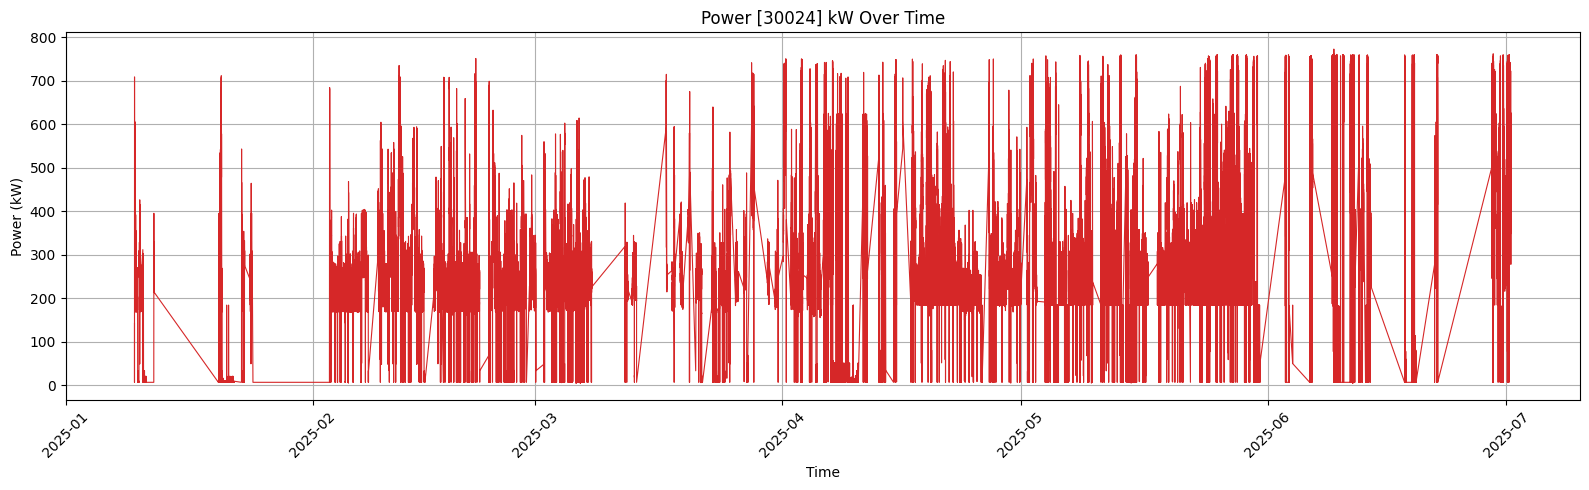

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(
    df_operating['Timestamp'],  # Use actual time
    df_operating['Power [30024] kW'],
    linestyle='-',   # Connect the points with lines
    color='tab:red',
    linewidth=0.8
)

plt.title('Power [30024] kW Over Time')
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


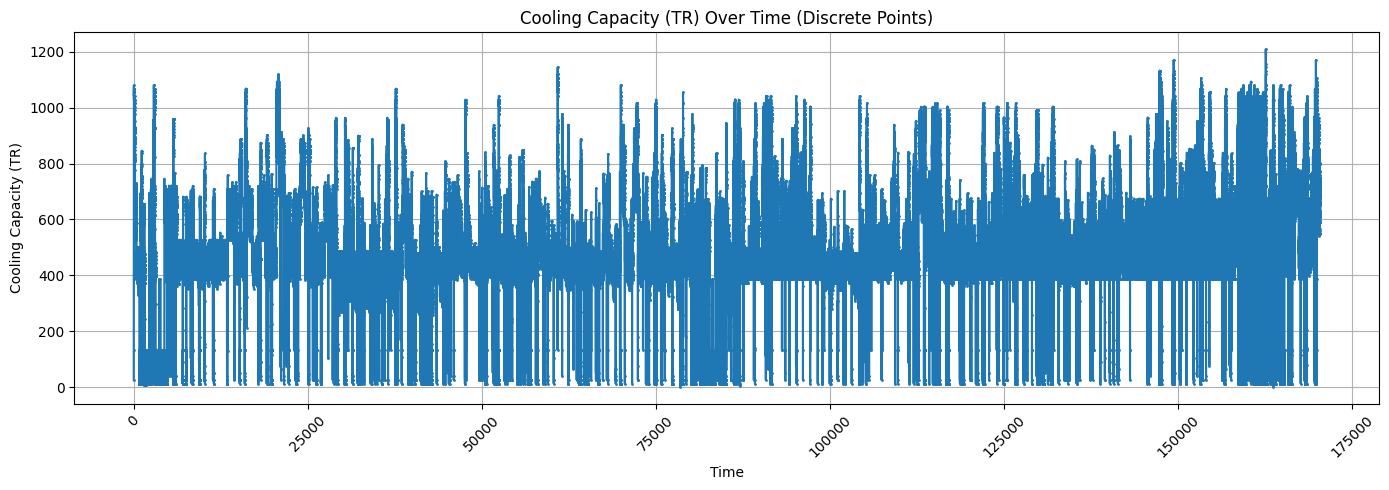

In [54]:
plt.figure(figsize=(14, 5))
plt.plot(df_operating.index, df_operating['Cooling_Capacity_TR'], 
         marker='o', linestyle='-', color='tab:blue', markersize=1)
plt.title('Cooling Capacity (TR) Over Time (Discrete Points)')
plt.xlabel('Time')
plt.ylabel('Cooling Capacity (TR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

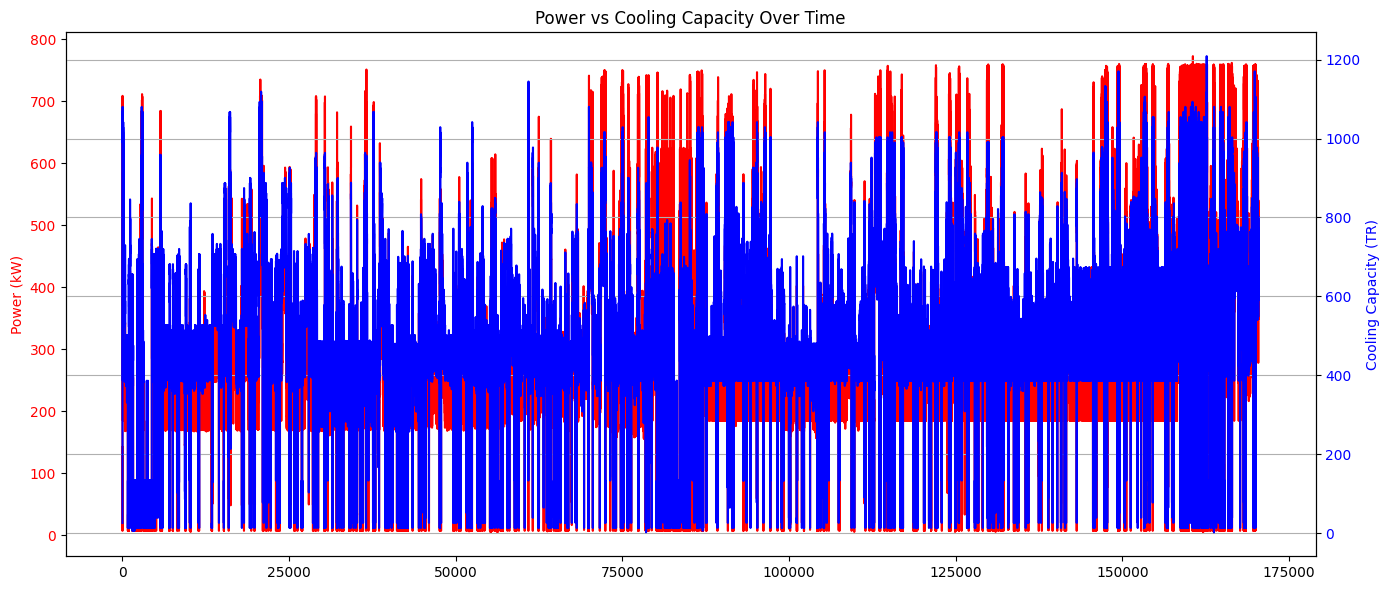

In [55]:

# Sort by timestamp
df_operating.sort_index(inplace=True)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Primary Y-axis: Power
ax1.plot(df_operating.index, df_operating['Power [30024] kW'], color='red', label='Power (kW)')
ax1.set_ylabel('Power (kW)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Secondary Y-axis: Cooling Capacity
ax2 = ax1.twinx()
ax2.plot(df_operating.index, df_operating['Cooling_Capacity_TR'], color='blue', label='Cooling Capacity (TR)')
ax2.set_ylabel('Cooling Capacity (TR)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and formatting
plt.title('Power vs Cooling Capacity Over Time')
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

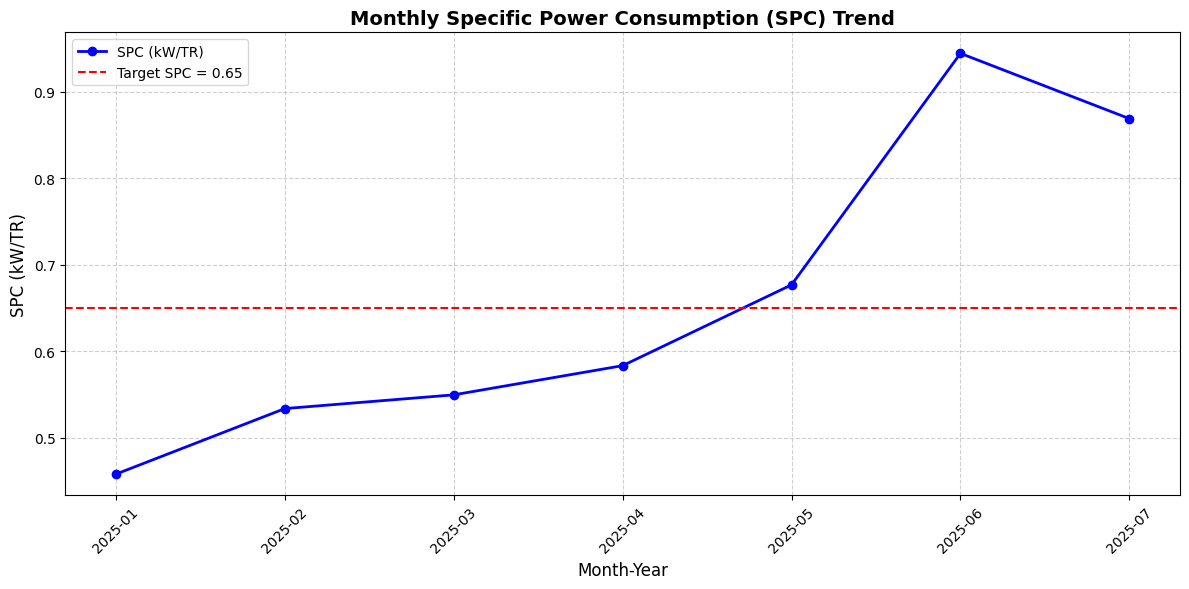

In [56]:
# Calculate monthly mean SPC
monthly_summary = df_operating.groupby('MonthYear', as_index=False)['SPC_kW_per_TR'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot SPC monthly mean
plt.plot(
    monthly_summary['MonthYear'].astype(str),
    monthly_summary['SPC_kW_per_TR'],
    marker='o',
    markersize=6,
    linewidth=2,
    color='blue',
    label='SPC (kW/TR)'
)

# Target SPC line
plt.axhline(0.65, color='red', linestyle='--', linewidth=1.5, label='Target SPC = 0.65')

# Titles and labels
plt.title("Monthly Specific Power Consumption (SPC) Trend", fontsize=14, fontweight='bold')
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("SPC (kW/TR)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


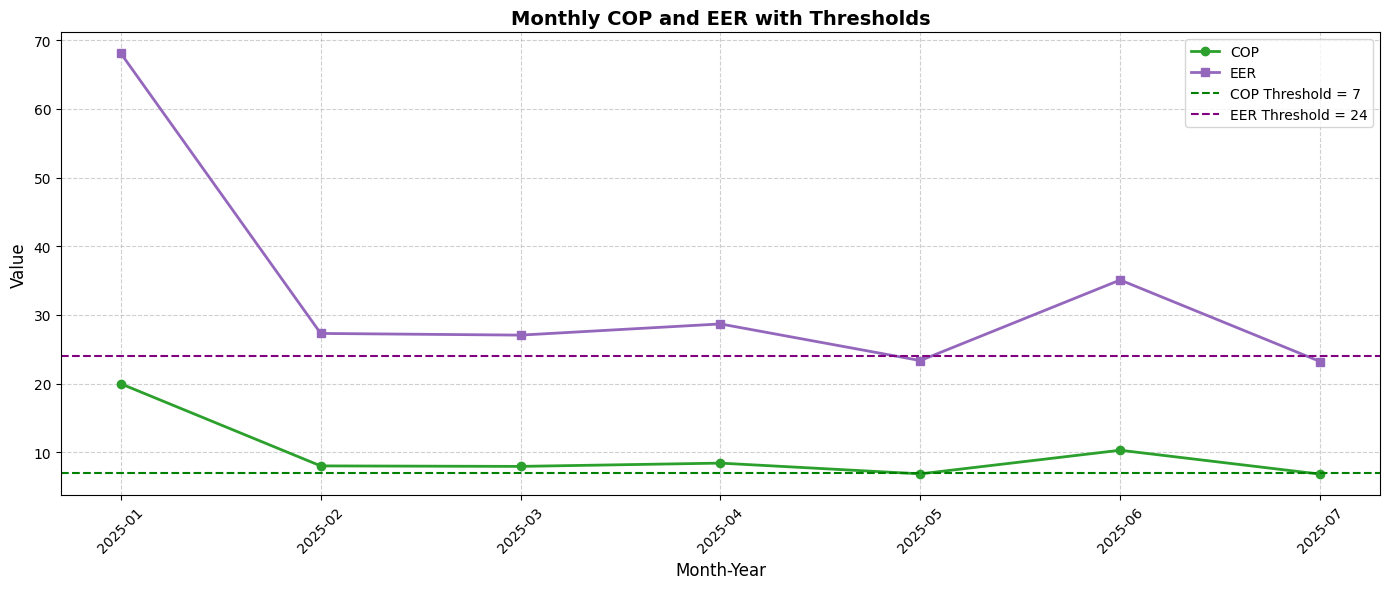

In [57]:
import matplotlib.pyplot as plt

# --- STEP 1: Monthly mean of existing COP & EER ---
monthly_summary = df_operating.groupby('MonthYear', as_index=False)[['COP', 'EER']].mean()

# --- STEP 2: Thresholds ---
cop_threshold = 7
eer_threshold = 24

# --- STEP 3: Plot ---
plt.figure(figsize=(14, 6))
x_labels = monthly_summary['MonthYear'].astype(str)

# COP & EER lines
plt.plot(x_labels, monthly_summary['COP'], marker='o', markersize=6,
         linewidth=2, label='COP', color='tab:green')
plt.plot(x_labels, monthly_summary['EER'], marker='s', markersize=6,
         linewidth=2, label='EER', color='tab:purple')

# Threshold lines
plt.axhline(y=cop_threshold, color='green', linestyle='--',
            linewidth=1.5, label=f'COP Threshold = {cop_threshold}')
plt.axhline(y=eer_threshold, color='purple', linestyle='--',
            linewidth=1.5, label=f'EER Threshold = {eer_threshold}')

# Formatting
plt.title('Monthly COP and EER with Thresholds', fontsize=14, fontweight='bold')
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

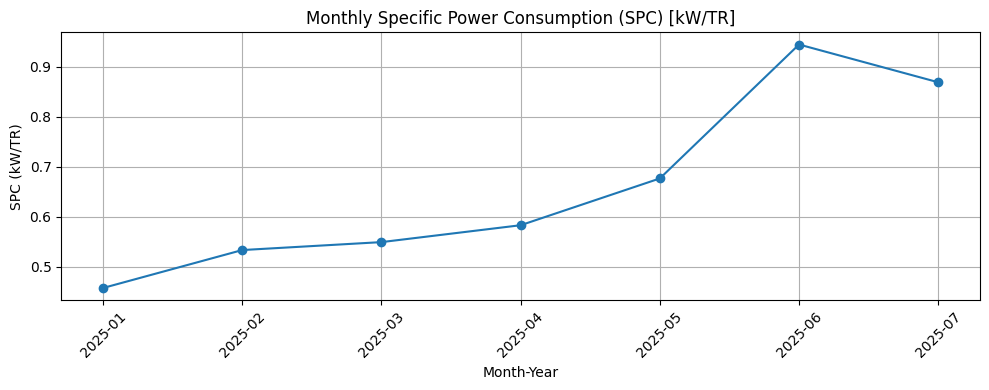

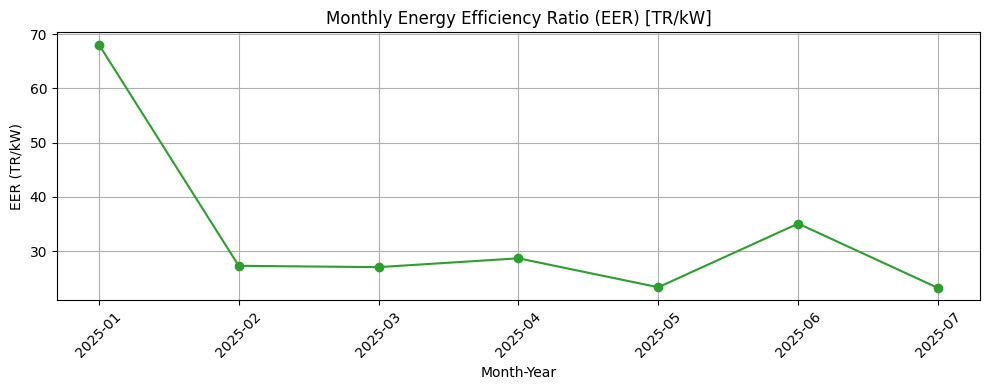

In [58]:
# Ensure MonthYear is string for better x-axis labeling
monthly_summary = df_operating.groupby('MonthYear', as_index=False)[['SPC_kW_per_TR', 'EER']].mean()

# --- SPC Plot ---
plt.figure(figsize=(10, 4))
plt.plot(monthly_summary['MonthYear'], monthly_summary['SPC_kW_per_TR'], marker='o', color='tab:blue')
plt.title('Monthly Specific Power Consumption (SPC) [kW/TR]')
plt.ylabel('SPC (kW/TR)')
plt.xlabel('Month-Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- EER Plot ---
plt.figure(figsize=(10, 4))
plt.plot(monthly_summary['MonthYear'], monthly_summary['EER'], marker='o', color='tab:green')
plt.title('Monthly Energy Efficiency Ratio (EER) [TR/kW]')
plt.ylabel('EER (TR/kW)')
plt.xlabel('Month-Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Saving By power

In [59]:
# Parameters
spc_limit = 0.65  # kW/TR
rate_per_kwh = 10  # ₹ per kWh
hours_per_month = 24 * 30  # 30 days

# Group by MonthYear to get monthly averages
monthly_avg = df_operating.groupby('MonthYear', as_index=False).agg({
    'Power [30024] kW': 'mean',
    'SPC_kW_per_TR': 'mean',
    'Cooling_Capacity_TR': 'mean'
})

# Ensure numeric float types
monthly_avg['Threshold_kW'] = (monthly_avg['Cooling_Capacity_TR'] * spc_limit).astype(float)
monthly_avg['Excess_kW'] = 0.0
monthly_avg['Total_kWh'] = 0.0
monthly_avg['Saving_Rs'] = 0.0
monthly_avg['SPC_Alert'] = ""
monthly_avg['Cost_Impact'] = ""

# Calculation and alert assignment
for i in range(len(monthly_avg)):
    actual_kw = monthly_avg.loc[i, 'Power [30024] kW']
    threshold_kw = monthly_avg.loc[i, 'Threshold_kW']
    spc = monthly_avg.loc[i, 'SPC_kW_per_TR']

    if actual_kw > threshold_kw and spc > spc_limit:
        diff = actual_kw - threshold_kw
        monthly_avg.loc[i, 'Excess_kW'] = diff
        monthly_avg.loc[i, 'Total_kWh'] = diff * hours_per_month
        monthly_avg.loc[i, 'Saving_Rs'] = monthly_avg.loc[i, 'Total_kWh'] * rate_per_kwh

    # SPC Alert
    if spc > spc_limit:
        monthly_avg.loc[i, 'SPC_Alert'] = "High SPC"     
    else:
        monthly_avg.loc[i, 'SPC_Alert'] = "OK"

    # Cost Impact
    if monthly_avg.loc[i, 'Saving_Rs'] > 0:
        monthly_avg.loc[i, 'Cost_Impact'] = "High"
    else:
        monthly_avg.loc[i, 'Cost_Impact'] = "Low"

# Output
print(monthly_avg[['MonthYear', 'Power [30024] kW', 'Cooling_Capacity_TR', 'SPC_kW_per_TR',
                   'Threshold_kW', 'Excess_kW', 'Total_kWh', 'Saving_Rs', 'SPC_Alert', 'Cost_Impact']])

print("\nTotal Potential Saving: ₹", monthly_avg['Saving_Rs'].sum())


  MonthYear  Power [30024] kW  Cooling_Capacity_TR  SPC_kW_per_TR  Threshold_kW  Excess_kW     Total_kWh      Saving_Rs SPC_Alert Cost_Impact
0   2025-01        183.025873           397.137673       0.457860    258.139487   0.000000      0.000000       0.000000        OK         Low
1   2025-02        257.430480           498.964103       0.533662    324.326667   0.000000      0.000000       0.000000        OK         Low
2   2025-03        256.375298           479.268548       0.549536    311.524556   0.000000      0.000000       0.000000        OK         Low
3   2025-04        298.385854           515.360350       0.583291    334.984228   0.000000      0.000000       0.000000        OK         Low
4   2025-05        340.908705           550.142052       0.676754    357.592334   0.000000      0.000000       0.000000  High SPC         Low
5   2025-06        430.556280           624.575661       0.944402    405.974180  24.582101  17699.112598  176991.125983  High SPC        High
6   20